In [64]:
import warnings
warnings.filterwarnings('ignore')

In [65]:
import numpy as np  # linear algebra
import pandas as pd  # data processing
import seaborn as sns  # visualization
import pylab
import calendar
from scipy import stats
import missingno as msno
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib import style
import sklearn
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error # for regression

In [66]:
bike = pd.read_csv('hour.csv')
bike.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [67]:
bike

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


In [68]:
bike_df = bike.copy()

In [69]:
bike_df

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


EDA

Checking the data formats of each column (attributes)

Checking the unique columns

In [70]:
bike_df.columns.unique()

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

Check whether there exists null values in the data

In [71]:
print(bike_df.isnull().sum().sort_values(ascending = False))

instant       0
weathersit    0
registered    0
casual        0
windspeed     0
hum           0
atemp         0
temp          0
workingday    0
dteday        0
weekday       0
holiday       0
hr            0
mnth          0
yr            0
season        0
cnt           0
dtype: int64


Checking data types

In [72]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Analysis of the data set

Season  

In [73]:
bike_df.season.value_counts()

3    4496
2    4409
1    4242
4    4232
Name: season, dtype: int64

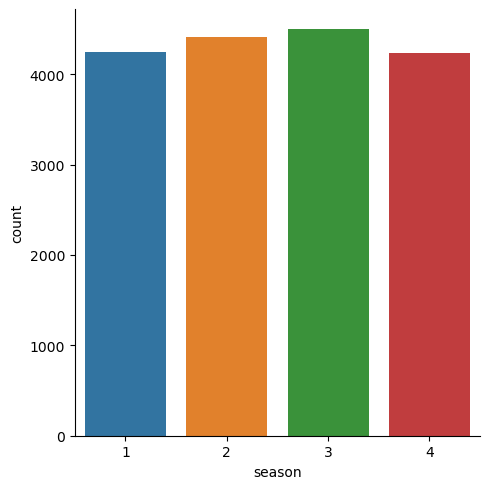

In [74]:
sns.catplot(x='season',data=bike_df,kind='count',height=5,aspect=1) #plotting it against the prediction variable
plt.show()

Holiday

In [75]:
bike_df.holiday.value_counts()

0    16879
1      500
Name: holiday, dtype: int64

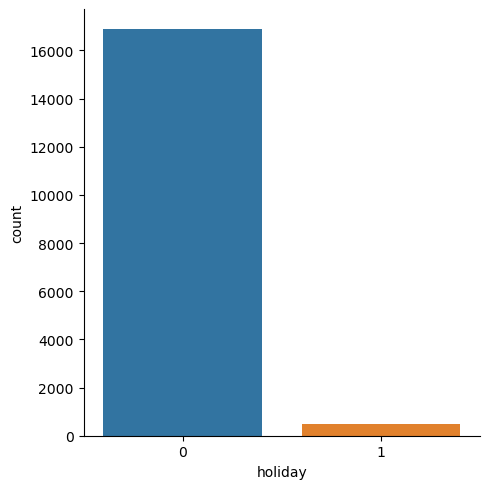

In [76]:
sns.catplot(x='holiday',data=bike_df,kind='count',height=5,aspect=1) # majority of data is for non holiday days.
plt.show()

Working day

In [77]:
bike_df.workingday.value_counts()

1    11865
0     5514
Name: workingday, dtype: int64

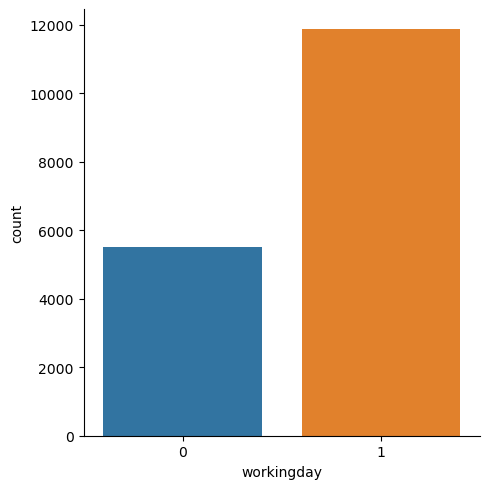

In [78]:
sns.factorplot(x='workingday',data=bike_df,kind='count',size=5,aspect=1) # majority of data is for working days.
plt.show()

Weather

In [79]:
bike_df.weathersit.value_counts()

1    11413
2     4544
3     1419
4        3
Name: weathersit, dtype: int64

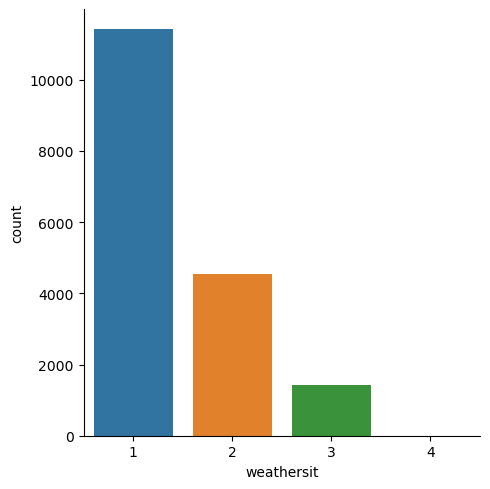

In [80]:
sns.factorplot(x='weathersit',data=bike_df,kind='count',size=5,aspect=1)
plt.show()

Boxplot for count

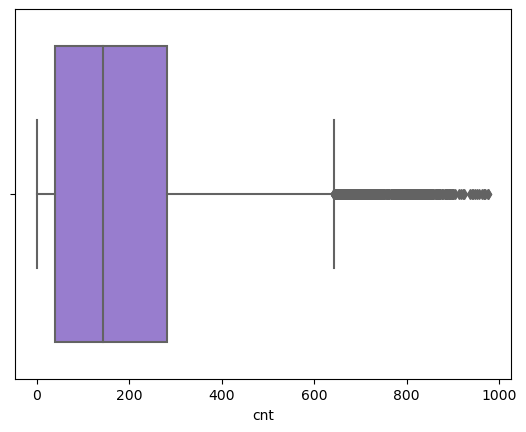

In [81]:
import matplotlib.pyplot as plt
sns.boxplot(x = 'cnt', data = bike_df, color = 'mediumpurple')
plt.show()

Distribution for all continuous columns

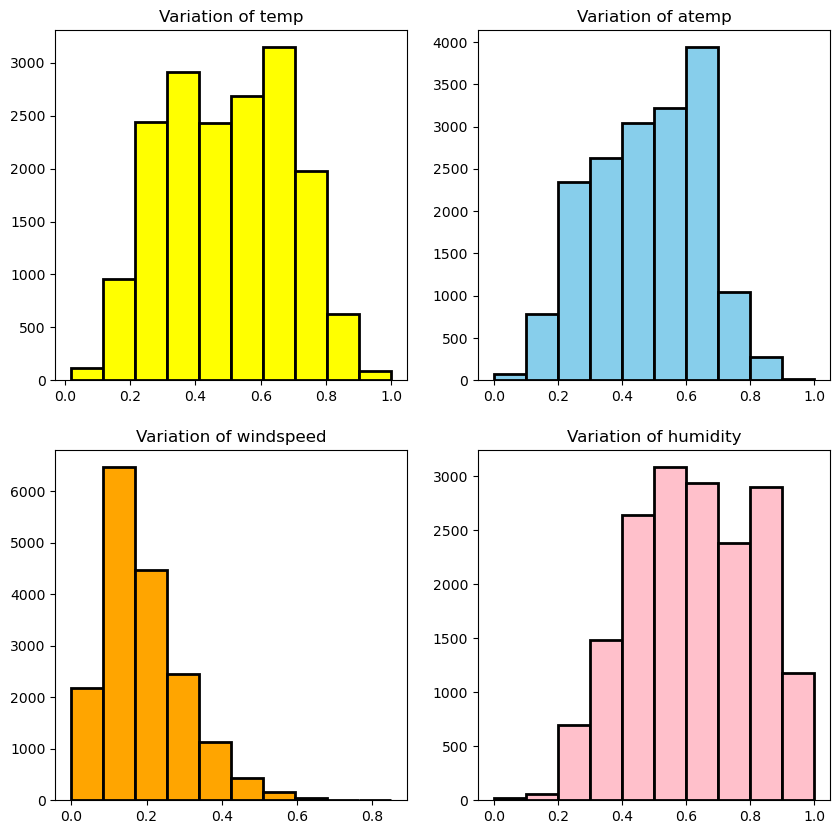

In [82]:
# histogram of all continuous variables

bike_df.temp.unique()
fig,axes=plt.subplots(2,2)
axes[0,0].hist(x="temp",data=bike_df,edgecolor="black",linewidth=2,color='yellow')
axes[0,0].set_title("Variation of temp")
axes[0,1].hist(x="atemp",data=bike_df,edgecolor="black",linewidth=2,color='skyblue')
axes[0,1].set_title("Variation of atemp")
axes[1,0].hist(x="windspeed",data=bike_df,edgecolor="black",linewidth=2,color='orange')
axes[1,0].set_title("Variation of windspeed")
axes[1,1].hist(x="hum",data=bike_df,edgecolor="black",linewidth=2,color='pink')
axes[1,1].set_title("Variation of humidity")
fig.set_size_inches(10,10)
plt.show()

Interrelationship for all features

For all the columns with continuous & discrete data types, we can calculate and display their interrelationship using heatmap.

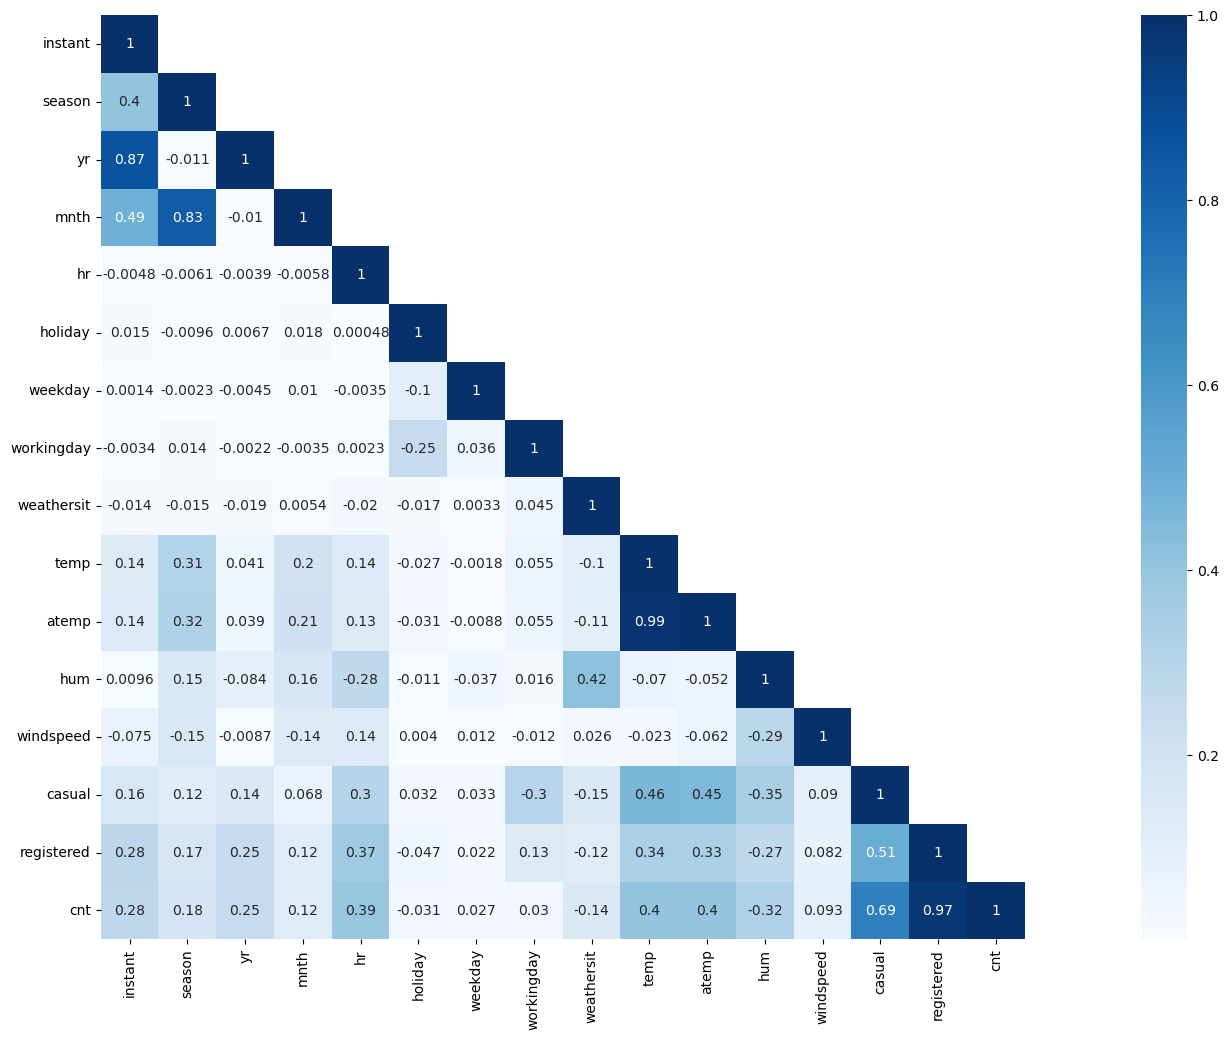

In [83]:
#corelation matrix.
cor_mat= bike_df[:].corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)] = False
fig=plt.gcf()
fig.set_size_inches(30,12)
sns.heatmap(data=np.abs(cor_mat),mask=mask,square=True,annot=cor_mat,cbar=True,cmap='Blues')
plt.show()

Outlier Analysis

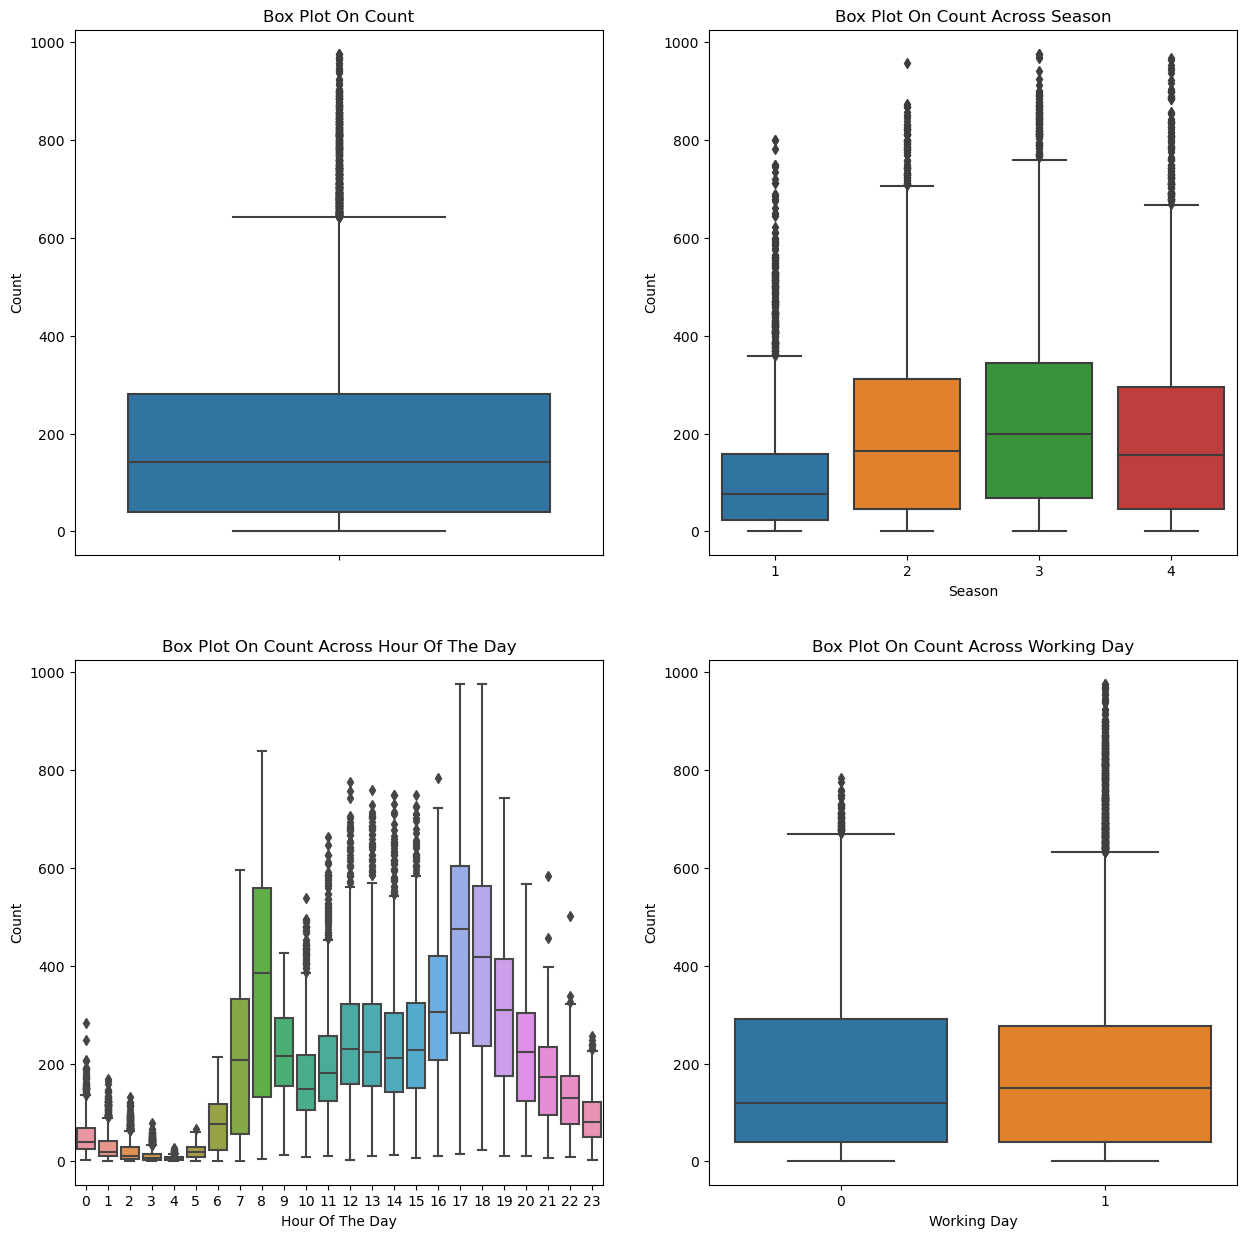

In [84]:
fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(15, 15)
sns.boxplot(data=bike_df,y="cnt",orient="v",ax=axes[0][0])
sns.boxplot(data=bike_df,y="cnt",x="season",orient="v",ax=axes[0][1])
sns.boxplot(data=bike_df,y="cnt",x="hr",orient="v",ax=axes[1][0])
sns.boxplot(data=bike_df,y="cnt",x="workingday",orient="v",ax=axes[1][1])

axes[0][0].set(ylabel='Count',title="Box Plot On Count")
axes[0][1].set(xlabel='Season', ylabel='Count',title="Box Plot On Count Across Season")
axes[1][0].set(xlabel='Hour Of The Day', ylabel='Count',title="Box Plot On Count Across Hour Of The Day")
axes[1][1].set(xlabel='Working Day', ylabel='Count',title="Box Plot On Count Across Working Day")
plt.show()

Visualizing Count Vs (Month,Season,Hour,Weekday,Usertype)

In [85]:
bike_m = bike.copy()

In [86]:
bike_m['dteday'] = pd.to_datetime(bike_m['dteday']) 
bike_m['weekday'] = bike_m['dteday'].dt.weekday 
bike_m['weekday'] = bike_m['dteday'].dt.day_name() 
bike_m['mnth'] = bike_m['dteday'].dt.month_name()

In [87]:
bike_m

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,January,0,0,Saturday,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,January,1,0,Saturday,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,January,2,0,Saturday,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,January,3,0,Saturday,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,January,4,0,Saturday,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,December,19,0,Monday,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,December,20,0,Monday,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,December,21,0,Monday,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,December,22,0,Monday,1,1,0.26,0.2727,0.56,0.1343,13,48,61


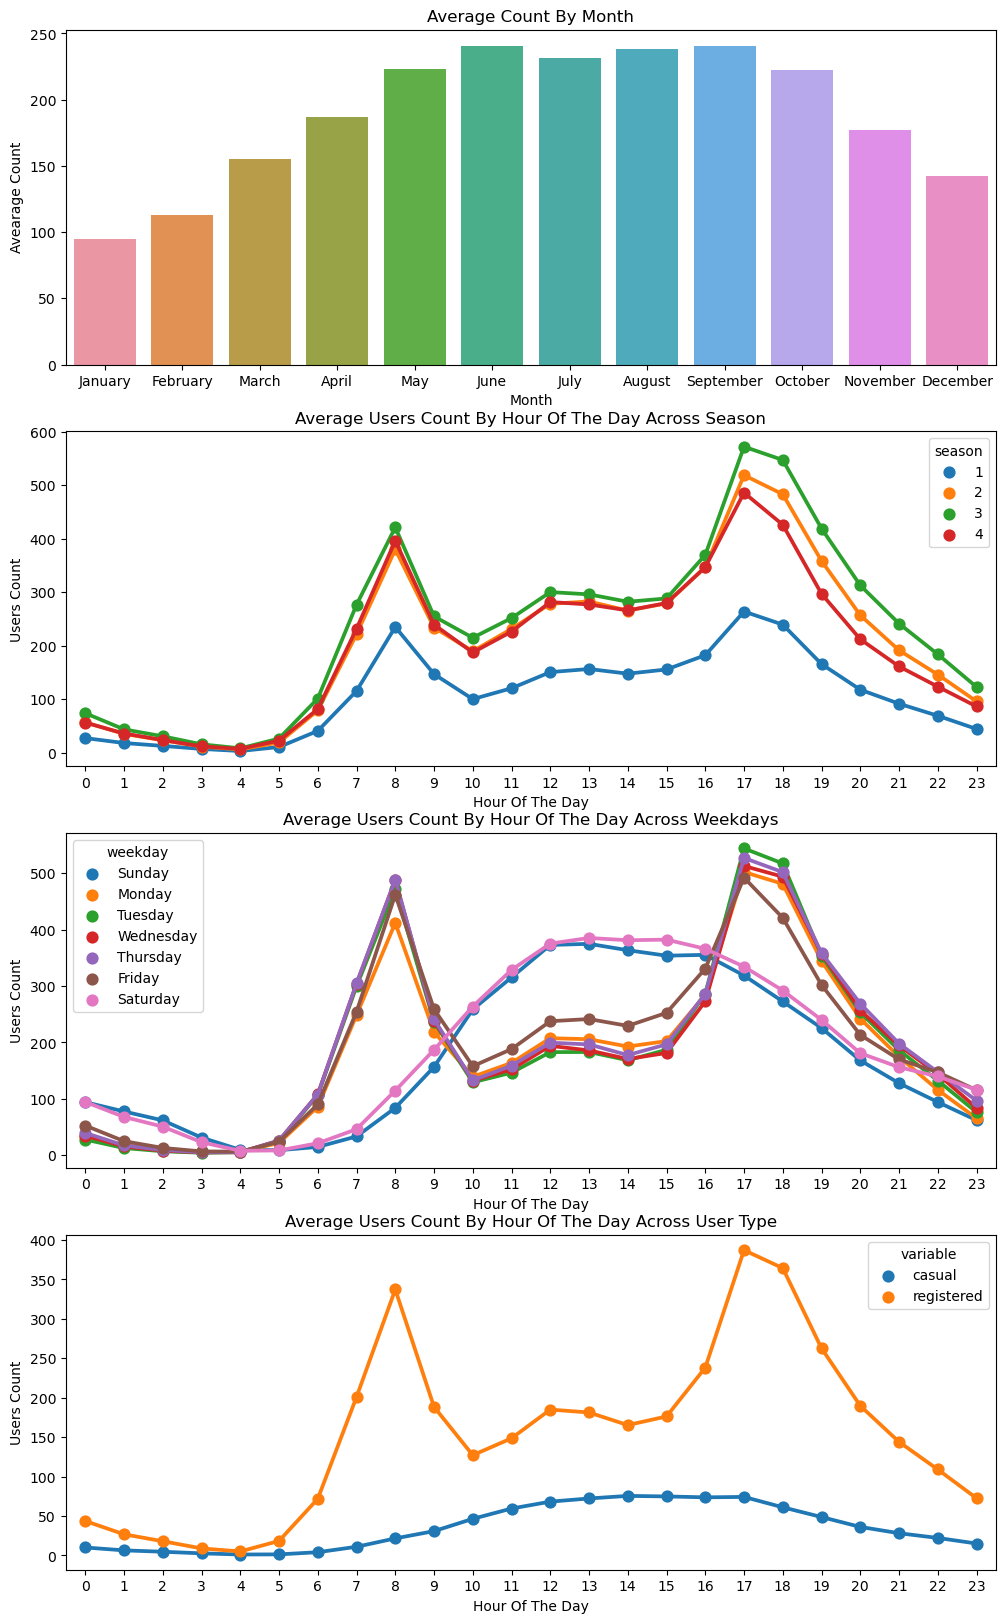

In [88]:
fig,(ax1,ax2,ax3,ax4)= plt.subplots(nrows=4)
fig.set_size_inches(12,20)
sortOrder = ["January","February","March","April","May","June","July","August","September","October","November","December"]
hueOrder = ["Sunday","Monday","Tuesday","Wednesday","Thursday","Friday","Saturday"]

monthAggregated = pd.DataFrame(bike_m.groupby("mnth")["cnt"].mean()).reset_index()
monthSorted = monthAggregated.sort_values(by="cnt",ascending=False)
sns.barplot(data=monthSorted,x="mnth",y="cnt",ax=ax1,order=sortOrder)
ax1.set(xlabel='Month', ylabel='Avearage Count',title="Average Count By Month")

hourAggregated = pd.DataFrame(bike_m.groupby(["hr","season"],sort=True)["cnt"].mean()).reset_index()
sns.pointplot(x=hourAggregated["hr"], y=hourAggregated["cnt"],hue=hourAggregated["season"], data=hourAggregated, join=True,ax=ax2)
ax2.set(xlabel='Hour Of The Day', ylabel='Users Count',title="Average Users Count By Hour Of The Day Across Season",label='big')

hourAggregated = pd.DataFrame(bike_m.groupby(["hr","weekday"],sort=True)["cnt"].mean()).reset_index()
sns.pointplot(x=hourAggregated["hr"], y=hourAggregated["cnt"],hue=hourAggregated["weekday"],hue_order=hueOrder, data=hourAggregated, join=True,ax=ax3)
ax3.set(xlabel='Hour Of The Day', ylabel='Users Count',title="Average Users Count By Hour Of The Day Across Weekdays",label='big')

hourTransformed = pd.melt(bike_m[["hr","casual","registered"]], id_vars=['hr'], value_vars=['casual', 'registered'])
hourAggregated = pd.DataFrame(hourTransformed.groupby(["hr","variable"],sort=True)["value"].mean()).reset_index()
sns.pointplot(x=hourAggregated["hr"], y=hourAggregated["value"],hue=hourAggregated["variable"],hue_order=["casual","registered"], data=hourAggregated, join=True,ax=ax4)
ax4.set(xlabel='Hour Of The Day', ylabel='Users Count',title="Average Users Count By Hour Of The Day Across User Type",label='big')

plt.show()

Dropping the casual and registered features, since the target feature is sum of them

Dropping the Date and time stamp features, since the target feature is not much affected by them        

In [89]:
bike_df=bike_df.drop('dteday',axis='columns')
bike_df=bike_df.drop('instant',axis='columns')
bike_df=bike_df.drop('casual',axis='columns')
bike_df=bike_df.drop('registered',axis='columns')

bike_df

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,16
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,40
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,32
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,13
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,119
17375,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,89
17376,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,90
17377,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,61


In [90]:
X_train,X_test,y_train,y_test=train_test_split(bike_df.drop('cnt',axis=1),bike_df['cnt'],test_size=20,random_state=42)


In [91]:
X_train

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed
621,1,0,1,3,0,6,0,1,0.20,0.2121,0.64,0.1343
14209,3,1,8,6,0,1,1,2,0.60,0.5758,0.78,0.1343
19,1,0,1,19,0,6,0,3,0.42,0.4242,0.88,0.2537
4836,3,0,7,10,0,1,1,1,0.82,0.8030,0.59,0.0000
8262,4,0,12,22,0,4,1,1,0.52,0.5000,0.63,0.3284
...,...,...,...,...,...,...,...,...,...,...,...,...
11284,2,1,4,9,0,5,1,1,0.46,0.4545,0.88,0.0896
11964,2,1,5,17,0,5,1,1,0.66,0.6212,0.34,0.1343
5390,3,0,8,12,0,3,1,1,0.80,0.7273,0.43,0.2836
860,1,0,2,7,0,2,1,1,0.24,0.1970,0.65,0.4179


In [92]:
y_train

621        8
14209    161
19        37
4836      84
8262     124
        ... 
11284    359
11964    812
5390     189
860      100
15795    779
Name: cnt, Length: 17359, dtype: int64

Model Fitting

Regression - The original data

In [93]:
## Regression - #Linear, Lasso, Ridge 
#regression
from sklearn.linear_model import LinearRegression,Ridge,Lasso,RidgeCV
#evaluation metrics
from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error # for regression

Linear Regression   

In [94]:
lr =LinearRegression()
lr.fit(X_train, y_train)
pred_lr  = lr.predict(X_test)
print(lr.score(X_train,y_train))
print(lr.score(X_test,y_test))

0.388559614600798
0.4939823959355051


In [95]:
print("Linear Regression")
print("R2_score",(r2_score(pred_lr,y_test)))
print("Mean Absolute Error",(mean_absolute_error(pred_lr,y_test)))
print("Mean Square Error",(mean_squared_error(pred_lr,y_test)))
print("Test Root Mean Square Error",(np.sqrt(mean_squared_error(pred_lr,y_test))))

Linear Regression
R2_score -0.7559955321662069
Mean Absolute Error 143.04190705006582
Mean Square Error 34600.991663810215
Test Root Mean Square Error 186.0134179671193


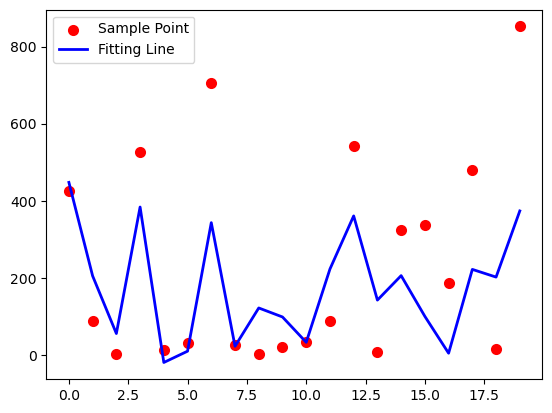

In [96]:
xx=range(0,len(y_test))
plt.scatter(xx,y_test,color="red",label="Sample Point",linewidth=2) 
plt.plot(xx,pred_lr,color="blue",label="Fitting Line",linewidth=2)
plt.legend()
plt.show()

Lasso 
    

In [97]:
param_test = {'max_iter':[5000],'alpha':[1e-10, 1e-8, 1e-4,1e-2, 1, 5, 10, 100, 500, 1000]}
gsearch = GridSearchCV(Lasso(fit_intercept=True, normalize=True, selection='random'),refit=True, param_grid = param_test, scoring='r2', cv=5)
gsearch.fit(X_train,y_train)
pred_las = gsearch.predict(X_test)
gsearch.best_params_

{'alpha': 0.0001, 'max_iter': 5000}

In [98]:
print(gsearch.scoring, ": Best params - ",gsearch.best_params_)
print("Lasso")
print("R2_score :",(r2_score(pred_las,y_test)))
print("Mean Absolute Error :",(mean_absolute_error(pred_las,y_test)))
print("Mean Square Error :",(mean_squared_error(pred_las,y_test)))
print("Root Mean Square Error :",(np.sqrt(mean_squared_error(pred_las,y_test))))

r2 : Best params -  {'alpha': 0.0001, 'max_iter': 5000}
Lasso
R2_score : -0.7553292314081663
Mean Absolute Error : 143.03076039022756
Mean Square Error : 34599.64971321528
Root Mean Square Error : 186.009810798289


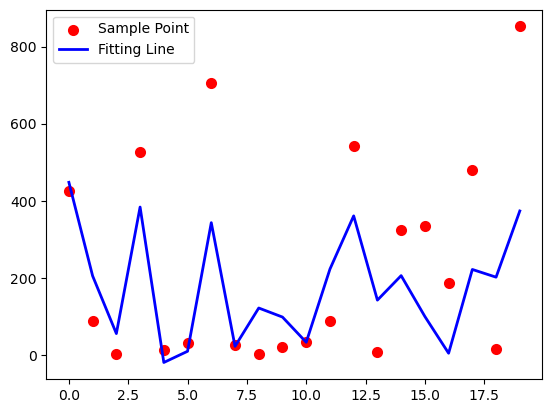

In [99]:
xx=range(0,len(y_test))
plt.scatter(xx,y_test,color="red",label="Sample Point",linewidth=2) 
plt.plot(xx,pred_las,color="blue",label="Fitting Line",linewidth=2)
plt.legend()
plt.show()

Ridge

In [100]:
param_test = {'max_iter':[5000],'alpha':[1e-10, 1e-8, 1e-4,1e-2, 1, 5, 10, 100, 500, 1000]}
rig = GridSearchCV(Ridge(),refit=True,
                       param_grid = param_test, scoring='r2', cv=5)
rig.fit(X_train,y_train)
pred_rig= rig.predict(X_test)
rig.best_params_

{'alpha': 5, 'max_iter': 5000}

In [101]:
print(gsearch.scoring, ": Best params - ",gsearch.best_params_)
print("Ridge")
print("R2_score",(r2_score(pred_rig,y_test))) #99.99% variance is explained by the model
print("Mean Absolute Error",(mean_absolute_error(pred_rig,y_test)))
print("Mean Square Error",(mean_squared_error(pred_rig,y_test)))
print("Root Mean Square Error",(np.sqrt(mean_squared_error(pred_rig,y_test))))

r2 : Best params -  {'alpha': 0.0001, 'max_iter': 5000}
Ridge
R2_score -0.7586209033667302
Mean Absolute Error 143.2004064460012
Mean Square Error 34662.22830576652
Root Mean Square Error 186.1779479577711


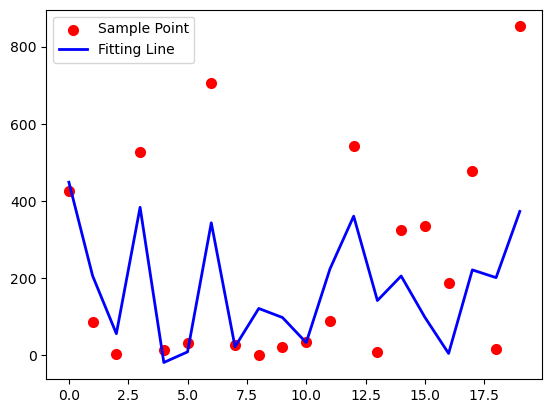

In [102]:
xx=range(0,len(y_test))
plt.scatter(xx,y_test,color="red",label="Sample Point",linewidth=2) 
plt.plot(xx,pred_rig,color="blue",label="Fitting Line",linewidth=2)
plt.legend()
plt.show()

Random Forest

In [103]:
models=[RandomForestRegressor(),AdaBoostRegressor(),BaggingRegressor()]
model_names=['RandomForestRegressor','AdaBoostRegressor','BaggingRegressor']
mse=[]
rmse=[]
r2=[]
a={}
for model in range (len(models)):
    clf=models[model]
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_test)
    mse.append(mean_squared_error(y_pred,y_test))
    rmse.append(np.sqrt(mean_squared_error(y_pred,y_test)))
    r2.append(r2_score(y_pred,y_test))
a={'Modelling Algo':model_names,'MSE':mse, 'RMSE':rmse, 'R2':r2} 

In [104]:
result_frame=pd.DataFrame(a)
result_frame

,Modelling Algo,MSE,RMSE,R2
0,RandomForestRegressor,2018.744865,44.930445,0.970225
1,AdaBoostRegressor,10106.026792,100.528736,0.693584
2,BaggingRegressor,1900.361500,43.593136,0.972963


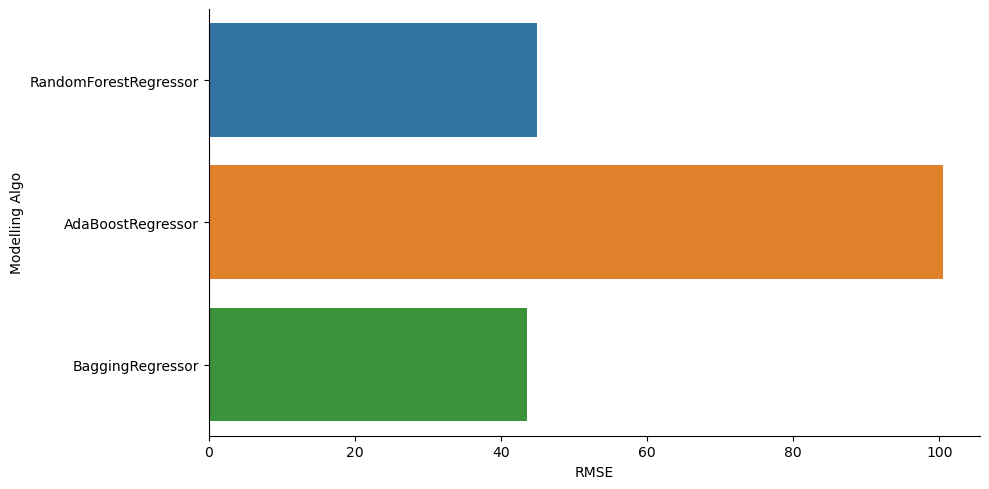

In [105]:
sns.factorplot(y='Modelling Algo',x='RMSE',data=result_frame,kind='bar',size=5,aspect=2)
plt.show()

In [106]:
no_of_test=[500,1000]
params_dict={'n_estimators':no_of_test,'n_jobs':[-1],'max_depth':[8,10]}
clf_rf=GridSearchCV(estimator=RandomForestRegressor(),param_grid=params_dict,scoring='r2',cv=5)
clf_rf.fit(X_train,y_train)
pred=clf_rf.predict(X_test)
print(f"Test MSE for random forest: {mean_squared_error(y_test, pred):4.3f}")
print(f"Test RMSE for random forest: {np.sqrt(mean_squared_error(y_test, pred)):4.3f}")
print(f"Test R^2 for the random forest model: {r2_score(y_test, pred):4.3f}")

Test MSE for random forest: 3549.387
Test RMSE for random forest: 59.577
Test R^2 for the random forest model: 0.948


In [107]:
clf_rf.best_params_

{'max_depth': 10, 'n_estimators': 1000, 'n_jobs': -1}

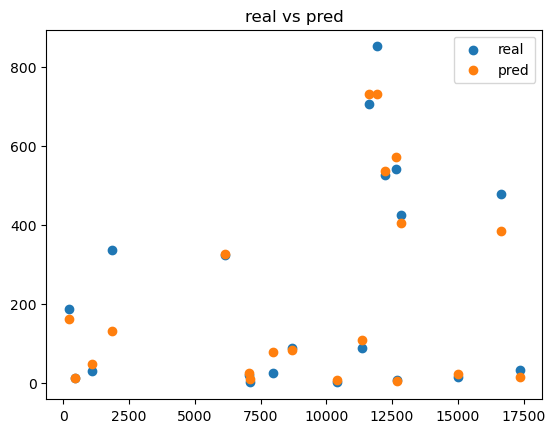

In [108]:
plt.scatter(y_test.index, y_test, label="real")
plt.scatter(y_test.index, pred, label="pred")
plt.title('real vs pred')
plt.legend()
plt.show()

Our predicted data fits well with the real data for Random Forest   

Neural Network

In [109]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import RandomizedSearchCV

In [110]:
nn = MLPRegressor(hidden_layer_sizes=(64, ), activation='relu',solver='adam', 
                    alpha=0.01,max_iter=200)

In [111]:
nn.fit(X_train, y_train)

y_pred=nn.predict(X_test)

In [112]:
y_pred = np.rint(y_pred).astype('int')

In [113]:
print(f"Test error: {mean_squared_error(y_test, y_pred):4.3f}")
print(f"Test RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):4.3f}")

print(f"Test R^2 for the neural network model: {r2_score(y_test, y_pred):4.3f}")

Test error: 18770.050
Test RMSE: 137.004
Test R^2 for the neural network model: 0.725


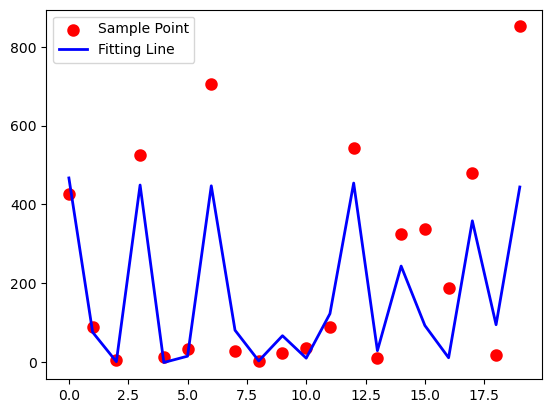

In [114]:
xx=range(0,len(y_test))
plt.scatter(xx,y_test,color="red",label="Sample Point",linewidth=3) 
plt.plot(xx,y_pred,color="blue",label="Fitting Line",linewidth=2)
plt.legend()
plt.show()

In [115]:
nn.get_params()


{'activation': 'relu',
 'alpha': 0.01,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (64,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 200,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

In [116]:
nn.fit(X_train, y_train)
y_pred=nn.predict(X_test)
y_pred = np.rint(y_pred).astype('int')

In [117]:
print(f"Test error: {mean_squared_error(y_test, y_pred):4.3f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):4.3f}")
print(f"Test R^2 for the neural network model: {r2_score(y_test, y_pred):4.3f}")

Test error: 20030.950
RMSE: 141.531
Test R^2 for the neural network model: 0.707


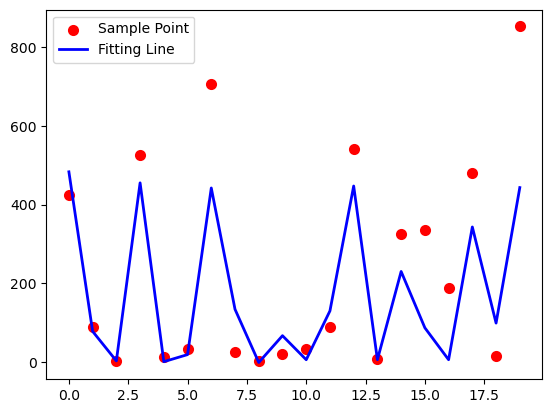

In [118]:
xx=range(0,len(y_test))
plt.scatter(xx,y_test,color="red",label="Sample Point",linewidth=2) 
plt.plot(xx,y_pred,color="blue",label="Fitting Line",linewidth=2)
plt.legend()
plt.show()

In [119]:
param_grid = {'alpha': [0.005, 0.01, 0.02], 
              'batch_size': ['auto', 500, 1000], 
              'hidden_layer_sizes': [(64, ), (64, 32, 64)]}
nn_2 = RandomizedSearchCV(nn, param_grid, return_train_score=True, scoring='r2', cv=5)
nn_2.fit(X_train, y_train)

y_pred=nn_2.predict(X_test)

In [120]:
print(f"Test error: {mean_squared_error(y_test, y_pred):4.3f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):4.3f}")
print(f"Test R^2 for the neural network model: {r2_score(y_test, y_pred):4.3f}")

Test error: 1791.047
RMSE: 42.321
Test R^2 for the neural network model: 0.974


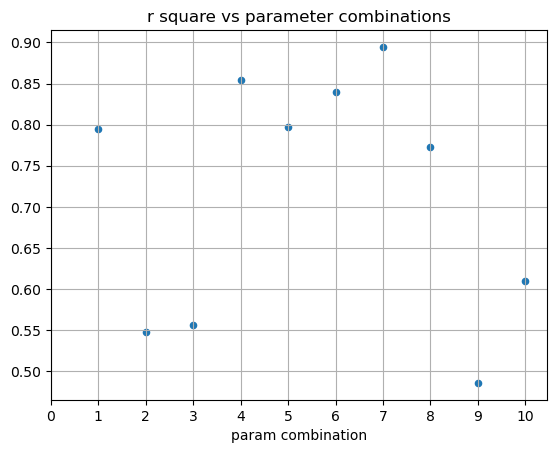

In [121]:
plt.scatter(range(1, 11), nn_2.cv_results_['mean_test_score'], s=20)
plt.grid(True)
plt.title("r square vs parameter combinations")
plt.xlabel("param combination")
plt.xticks(np.arange(0, 11, 1))
plt.show()

The best score is:  

In [122]:
nn_2.best_score_


0.8946114342339632

The best parameter combine is:

In [123]:
nn_2.best_params_

{'hidden_layer_sizes': (64, 32, 64), 'batch_size': 'auto', 'alpha': 0.005}

Test error: 1798.650
Test error: 42.410
Test R^2 for the neural network model: 0.974


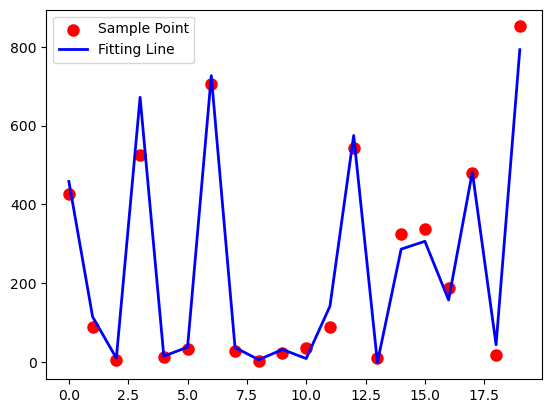

In [124]:
y_pred = np.rint(y_pred).astype('int')
print(f"Test error: {mean_squared_error(y_test, y_pred):4.3f}")
print(f"Test error: {np.sqrt(mean_squared_error(y_test, y_pred)):4.3f}")

print(f"Test R^2 for the neural network model: {r2_score(y_test, y_pred):4.3f}")
xx=range(0,len(y_test))
plt.scatter(xx,y_test,color="red",label="Sample Point",linewidth=3) 
plt.plot(xx,y_pred,color="blue",label="Fitting Line",linewidth=2)
plt.legend()
plt.show()

Without outliers

We remove all the outliers by setting a threshold of no larger than 3 times the std. deviation

In [128]:
bike_wo_outlier = bike_df[np.abs(bike_df["cnt"]-bike_df["cnt"].mean())<=(3*bike_df["cnt"].std())] 

In [129]:
print ("Shape Of The Before Ouliers: ",bike_df.shape)
print ("Shape Of The After Ouliers: ",bike_wo_outlier.shape)

Shape Of The Before Ouliers:  (17379, 13)
Shape Of The After Ouliers:  (17135, 13)


In [132]:
bike_wo_outlier

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,16
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,40
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,32
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,13
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,119
17375,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,89
17376,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,90
17377,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,61


In [133]:
X_train,X_test,y_train,y_test=train_test_split(bike_wo_outlier.drop('cnt',axis=1),bike_wo_outlier['cnt'],test_size=0.1,random_state=81)

In [134]:
X_train

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed
3593,2,0,6,15,0,5,1,1,0.70,0.6364,0.28,0.2836
5640,3,0,8,11,0,0,0,1,0.70,0.6515,0.58,0.3881
2838,2,0,5,4,0,2,1,1,0.52,0.5000,0.88,0.2239
5290,3,0,8,8,0,6,0,2,0.70,0.6515,0.65,0.1642
15065,4,1,9,22,0,1,1,1,0.50,0.4848,0.51,0.2239
...,...,...,...,...,...,...,...,...,...,...,...,...
3523,2,0,5,17,0,2,1,1,0.84,0.8030,0.53,0.2239
16573,4,1,11,7,0,3,1,2,0.26,0.2576,0.56,0.1940
4171,3,0,6,17,0,1,1,1,0.74,0.6818,0.55,0.1343
13306,3,1,7,15,0,5,1,2,0.80,0.7121,0.36,0.1045


In [135]:
y_train

3593     212
5640     237
2838       4
5290     118
15065    172
        ... 
3523     495
16573    409
4171     604
13306    353
16437    228
Name: cnt, Length: 15421, dtype: int64

Linear Regression   

Model Fitting

Regression - without outliers data

In [136]:
## Regression - #Linear, Lasso, Ridge 
#regression
from sklearn.linear_model import LinearRegression,Ridge,Lasso,RidgeCV
#evaluation metrics
from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error # for regression

Linear Regression   

In [137]:
lr =LinearRegression()
lr.fit(X_train, y_train)
pred_lr  = lr.predict(X_test)
print(lr.score(X_train,y_train))
print(lr.score(X_test,y_test))

0.3821260287715076
0.3953421122331787


In [138]:
print("Linear Regression")
print("R2_score",(r2_score(pred_lr,y_test)))
print("Mean Absolute Error",(mean_absolute_error(pred_lr,y_test)))
print("Mean Square Error",(mean_squared_error(pred_lr,y_test)))
print("Test Root Mean Square Error",(np.sqrt(mean_squared_error(pred_lr,y_test))))

Linear Regression
R2_score -0.5413241404647255
Mean Absolute Error 97.5766965864455
Mean Square Error 16662.389830231714
Test Root Mean Square Error 129.08287969452692


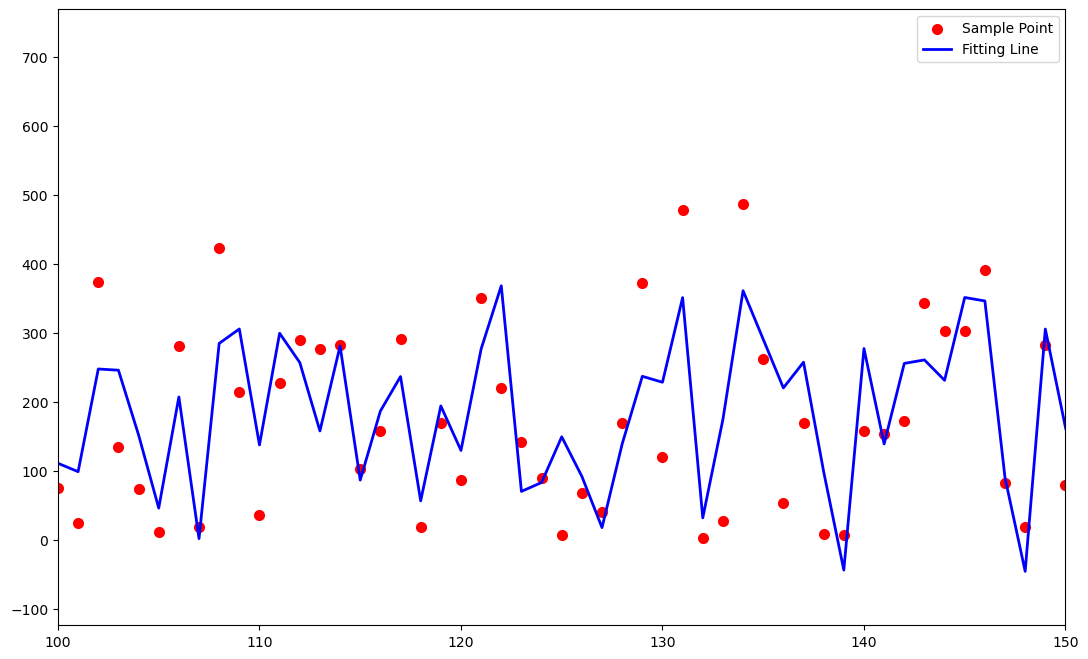

In [148]:
xx=range(0,len(y_test))
plt.figure(figsize=(13,8))
plt.scatter(xx,y_test,color="red",label="Sample Point",linewidth=2) 
plt.plot(xx,pred_lr,color="blue",label="Fitting Line",linewidth=2)
plt.xlim(100, 150)
plt.legend()
plt.show()

Lasso 
    

In [140]:
param_test = {'max_iter':[5000],'alpha':[1e-10, 1e-8, 1e-4,1e-2, 1, 5, 10, 100, 500, 1000]}
gsearch = GridSearchCV(Lasso(fit_intercept=True, normalize=True, selection='random'),refit=True, param_grid = param_test, scoring='r2', cv=5)
gsearch.fit(X_train,y_train)
pred_las = gsearch.predict(X_test)
gsearch.best_params_

{'alpha': 1e-10, 'max_iter': 5000}

In [141]:
print(gsearch.scoring, ": Best params - ",gsearch.best_params_)
print("Lasso")
print("R2_score :",(r2_score(pred_las,y_test)))
print("Mean Absolute Error :",(mean_absolute_error(pred_las,y_test)))
print("Mean Square Error :",(mean_squared_error(pred_las,y_test)))
print("Root Mean Square Error :",(np.sqrt(mean_squared_error(pred_las,y_test))))

r2 : Best params -  {'alpha': 1e-10, 'max_iter': 5000}
Lasso
R2_score : -0.541324141282437
Mean Absolute Error : 97.57669658762863
Mean Square Error : 16662.389830789503
Root Mean Square Error : 129.0828796966875


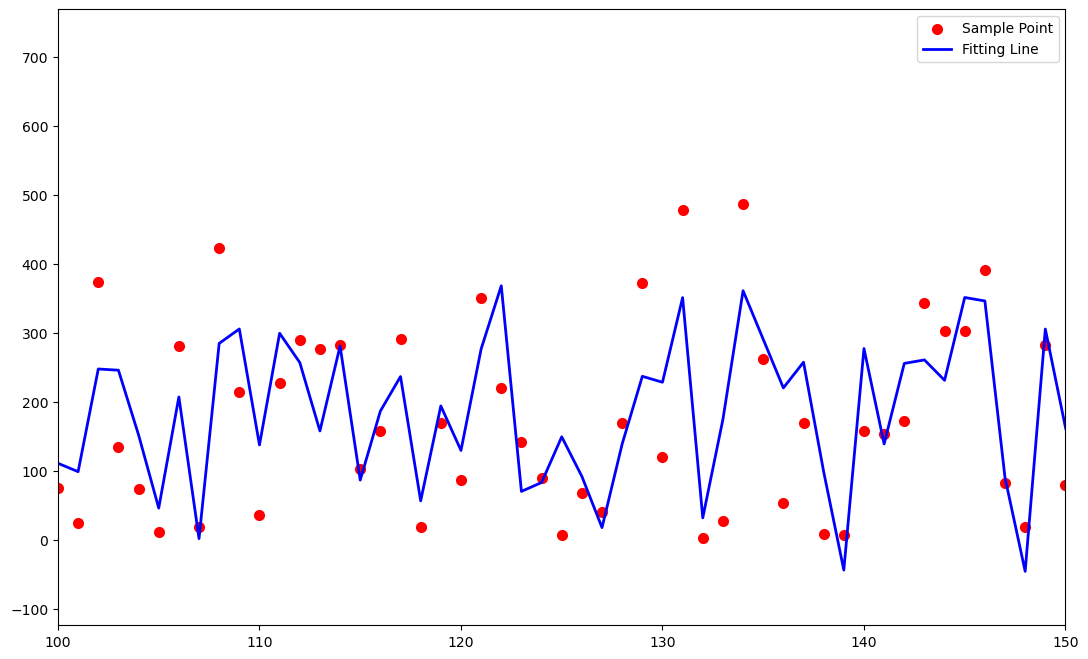

In [149]:
xx=range(0,len(y_test))
plt.figure(figsize=(13,8))
plt.scatter(xx,y_test,color="red",label="Sample Point",linewidth=2) 
plt.plot(xx,pred_las,color="blue",label="Fitting Line",linewidth=2)
plt.xlim(100, 150)
plt.legend()
plt.show()

Ridge

In [143]:
param_test = {'max_iter':[5000],'alpha':[1e-10, 1e-8, 1e-4,1e-2, 1, 5, 10, 100, 500, 1000]}
rig = GridSearchCV(Ridge(),refit=True,
                       param_grid = param_test, scoring='r2', cv=5)
rig.fit(X_train,y_train)
pred_rig= rig.predict(X_test)
rig.best_params_

{'alpha': 1, 'max_iter': 5000}

In [144]:
print(gsearch.scoring, ": Best params - ",gsearch.best_params_)
print("Ridge")
print("R2_score",(r2_score(pred_rig,y_test))) #99.99% variance is explained by the model
print("Mean Absolute Error",(mean_absolute_error(pred_rig,y_test)))
print("Mean Square Error",(mean_squared_error(pred_rig,y_test)))
print("Root Mean Square Error",(np.sqrt(mean_squared_error(pred_rig,y_test))))

r2 : Best params -  {'alpha': 1e-10, 'max_iter': 5000}
Ridge
R2_score -0.5435430207681753
Mean Absolute Error 97.58035137840437
Mean Square Error 16664.001440660173
Root Mean Square Error 129.08912208493857


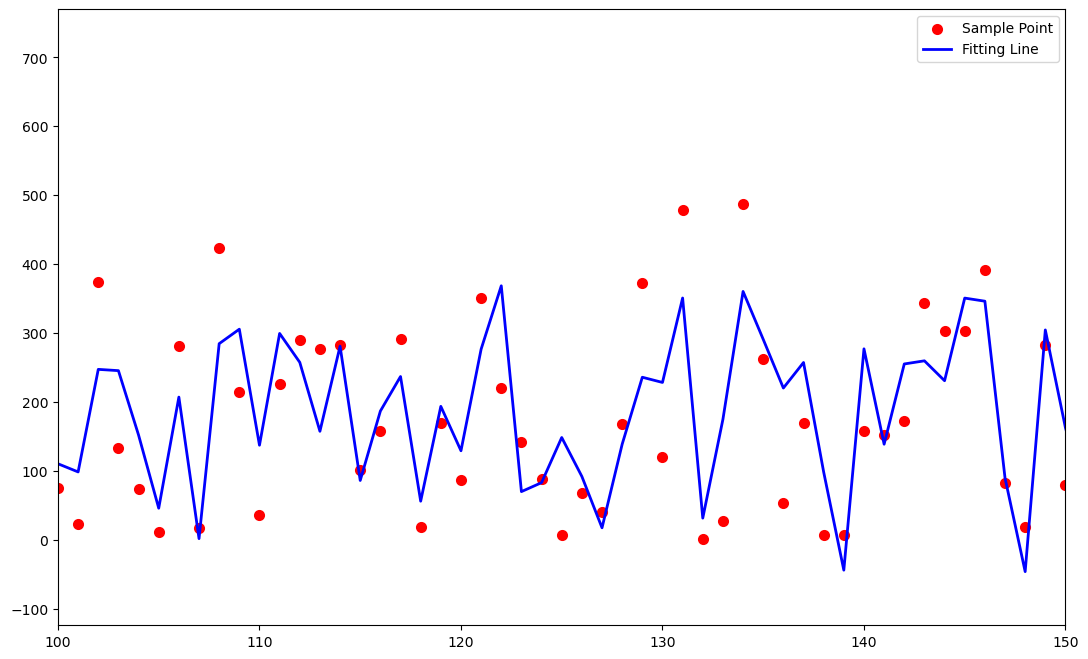

In [150]:
xx=range(0,len(y_test))
plt.figure(figsize=(13,8))
plt.scatter(xx,y_test,color="red",label="Sample Point",linewidth=2) 
plt.plot(xx,pred_rig,color="blue",label="Fitting Line",linewidth=2)
plt.xlim(100, 150)
plt.legend()
plt.show()

Random Forest

In [151]:
models=[RandomForestRegressor(),AdaBoostRegressor(),BaggingRegressor()]
model_names=['RandomForestRegressor','AdaBoostRegressor','BaggingRegressor']
mse=[]
rmse=[]
r2=[]
a={}
for model in range (len(models)):
    clf=models[model]
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_test)
    mse.append(mean_squared_error(y_pred,y_test))
    rmse.append(np.sqrt(mean_squared_error(y_pred,y_test)))
    r2.append(r2_score(y_pred,y_test))
a={'Modelling Algo':model_names,'MSE':mse, 'RMSE':rmse, 'R2':r2} 

In [152]:
result_frame=pd.DataFrame(a)
result_frame

,Modelling Algo,MSE,RMSE,R2
0,RandomForestRegressor,1719.970592,41.472528,0.931390
1,AdaBoostRegressor,11621.802499,107.804464,0.411910
2,BaggingRegressor,1969.368733,44.377570,0.922309


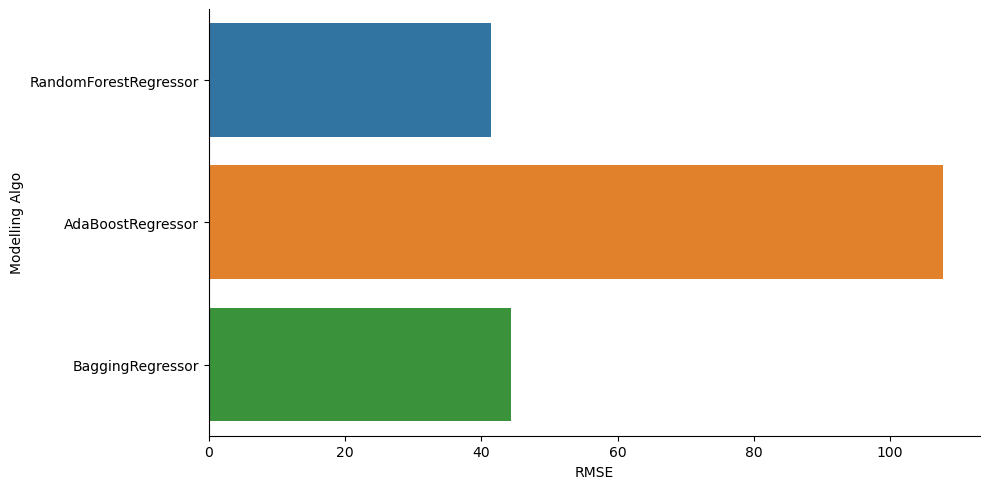

In [153]:
sns.factorplot(y='Modelling Algo',x='RMSE',data=result_frame,kind='bar',size=5,aspect=2)
plt.show()

In [154]:
no_of_test=[500,1000]
params_dict={'n_estimators':no_of_test,'n_jobs':[-1],'max_depth':[8,10]}
clf_rf=GridSearchCV(estimator=RandomForestRegressor(),param_grid=params_dict,scoring='r2',cv=5)
clf_rf.fit(X_train,y_train)
pred=clf_rf.predict(X_test)
print(f"Test MSE for random forest: {mean_squared_error(y_test, pred):4.3f}")
print(f"Test RMSE for random forest: {np.sqrt(mean_squared_error(y_test, pred)):4.3f}")
print(f"Test R^2 for the random forest model: {r2_score(y_test, pred):4.3f}")

Test MSE for random forest: 2620.119
Test RMSE for random forest: 51.187
Test R^2 for the random forest model: 0.905


In [155]:
clf_rf.best_params_

{'max_depth': 10, 'n_estimators': 500, 'n_jobs': -1}

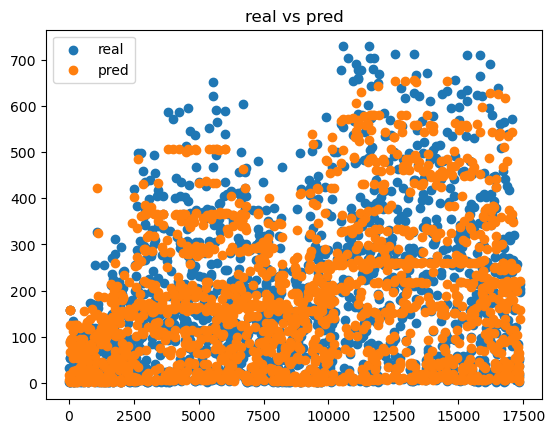

In [156]:
plt.scatter(y_test.index, y_test, label="real")
plt.scatter(y_test.index, pred, label="pred")
plt.title('real vs pred')
plt.legend()
plt.show()